In [1]:
import tensorflow as tf
import numpy as np
from predictor import Predictor
import matplotlib.pyplot as plt
import pandas as pd
import math
from  models import esum2, esum
import random

In [3]:
input_width = 32
label_width = 1
shift = 1
sections = int(math.log2(input_width))
model = "models/dense1"
# model = dense_model((input_width, sample_width), units=2 ** 12, sections=sections)
predictor = Predictor("datas/EURUSD_H1 copy.csv", model,
    input_width=input_width,
    label_width=label_width,
    shift=shift,
    train_ratio=0.8,
    val_ratio=0.1,
    test_ratio=0.1,
    batch_size=256,
)

Размер train: 43447
Размер validation: 5430
Размер test: 5432
Размер окна: 33
Размер входа: 32
Размер выхода: 1
Индексы входа: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Индексы выхода: [32]


In [4]:
df = pd.read_csv(
    "datas/EURUSD_H1 copy.csv", sep="\t", header=0, dtype={"open": float,"close": float,"tickvol": float,"vol": float},
    parse_dates=[[0,1]],
    index_col=[0],
    names=["date","time","open","high","low","close","tickvol","vol","spread"])
t_count = 2**7
t_shift = random.randint(0,2**14)
prices = df['open'][-t_count-t_shift:-1-t_shift]
shift = predictor.dataloader.input_width
ds = predictor.dataloader.make_dataset(prices)
for i,l in ds:
    print(i.shape, l.shape)

labels = l.numpy()
n = len(labels)
# print(i.numpy()[shift+16:].flatten())
# print(labels)

(94, 32) (94, 1)


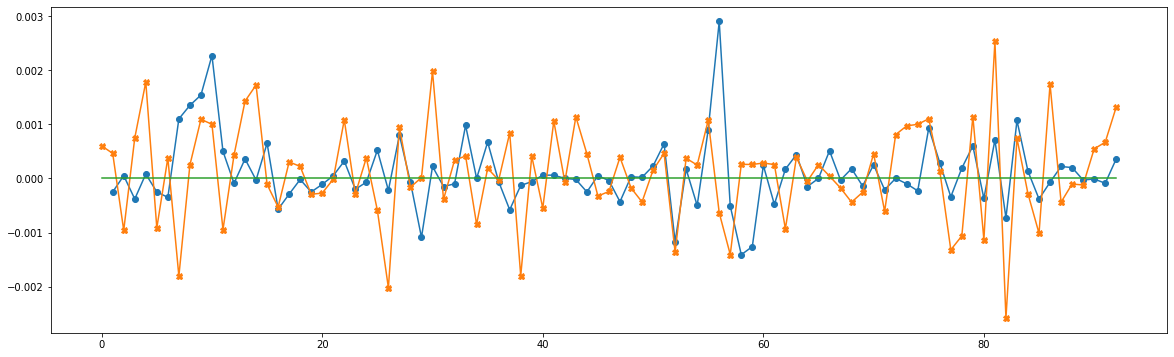

In [6]:
inputs = []
result1 = []
t = np.arange(len(prices)+predictor.dataloader.shift)
for i in range(len(prices)-predictor.dataloader.total_window_size-1):
    inputs.append((prices[i+predictor.dataloader.input_width+1]-prices[i+predictor.dataloader.input_width]))
    r = predictor.predict(prices[i:i+predictor.dataloader.input_width+1]).flatten()
    # plt.plot(
    #     t[i+predictor.dataloader.input_width:i+predictor.dataloader.input_width+predictor.dataloader.shift],
    #     r.flatten(),
    #     marker='o')
    result1.append(r)
# outputs = predictor.iterate(prices[:-16], steps=16)
plt.subplots(nrows=1, ncols=1,figsize=(20,6))
plt.plot(t[1:len(inputs)],inputs[:len(inputs)-1], marker='o')
plt.plot(t[:len(inputs)],result1, marker='X')
plt.plot(t[:len(inputs)],np.zeros(len(inputs)))
# plt.plot(t[-len(outputs):n],outputs, marker='^')